In [1]:
# import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Analyse Power Actuals

In [2]:
power_actual = pd.read_csv('power_actual.csv')

In [3]:
power_actual.head()

,Unnamed: 0,datetime,ghi,gti,power
0,0,2017-10-01 00:00:00,0.0,0.0,0.0
1,1,2017-10-01 00:15:00,0.0,0.0,0.0
2,2,2017-10-01 00:30:00,0.0,0.0,0.0
3,3,2017-10-01 00:45:00,0.0,0.0,0.0
4,4,2017-10-01 01:00:00,0.0,0.0,0.0


In [4]:
power_actual.shape

(70080, 5)

In [5]:
power_actual.dtypes

Unnamed: 0      int64
datetime       object
ghi           float64
gti           float64
power         float64
dtype: object

In [6]:
power_actual = power_actual.drop(columns=['Unnamed: 0'])

In [7]:
power_actual['datetime'] = pd.to_datetime(power_actual['datetime'])

In [8]:
power_actual = power_actual.set_index('datetime')

In [9]:
power_actual.head(10)

,ghi,gti,power
datetime,,,
2017-10-01 00:00:00,0.0,0.0,0.0
2017-10-01 00:15:00,0.0,0.0,0.0
2017-10-01 00:30:00,0.0,0.0,0.0
2017-10-01 00:45:00,0.0,0.0,0.0
2017-10-01 01:00:00,0.0,0.0,0.0
2017-10-01 01:15:00,0.0,0.0,0.0
2017-10-01 01:30:00,0.0,0.0,0.0
2017-10-01 01:45:00,0.0,0.0,0.0
2017-10-01 02:00:00,0.0,0.0,0.0


In [10]:
power_actual.tail(10)

,ghi,gti,power
datetime,,,
2019-09-30 21:30:00,0.0,0.0,0.0
2019-09-30 21:45:00,0.0,0.0,0.0
2019-09-30 22:00:00,0.0,0.0,0.0
2019-09-30 22:15:00,0.0,0.0,0.0
2019-09-30 22:30:00,0.0,0.0,0.0
2019-09-30 22:45:00,0.0,0.0,0.0
2019-09-30 23:00:00,0.0,0.0,0.0
2019-09-30 23:15:00,0.0,0.0,0.0
2019-09-30 23:30:00,0.0,0.0,0.0


In [11]:
for column in ('ghi', 'gti', 'power'):
    print('{} | Max: {} | Min: {}'.format(
        column, power_actual[column].max(),
        power_actual[column].min()
    ))

ghi | Max: 0.0 | Min: 0.0
gti | Max: 0.0 | Min: 0.0
power | Max: 16172.04 | Min: 0.0


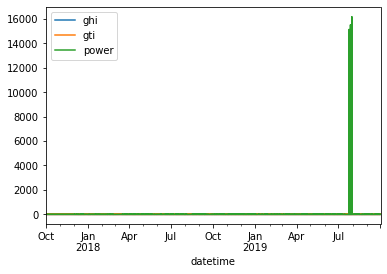

In [12]:
power_actual.plot()

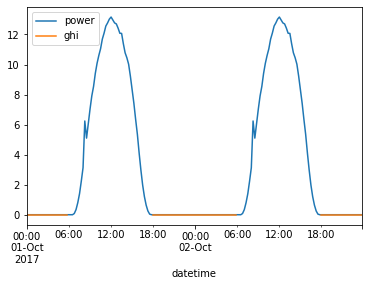

In [13]:
power_actual.loc['2017-10-01':'2017-10-02', ['power', 'ghi']].plot()

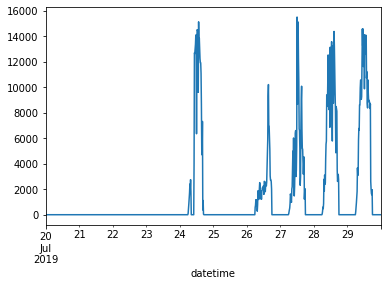

In [14]:
power_actual.loc['2019-07-20':'2019-07-29', 'power'].plot()

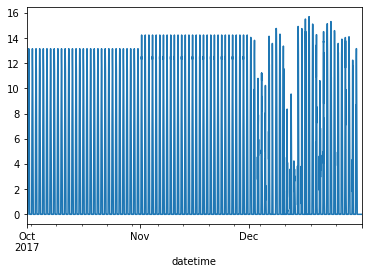

In [15]:
power_actual.loc['2017', 'power'].plot()

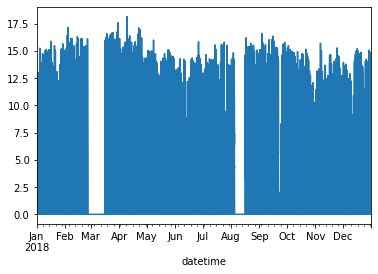

In [16]:
power_actual.loc['2018', 'power'].plot()

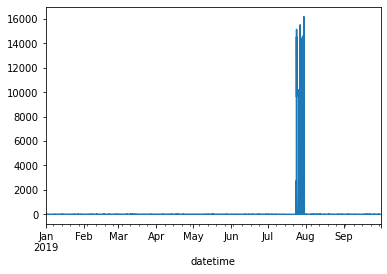

In [17]:
power_actual.loc['2019', 'power'].plot()

In [18]:
power_actual = power_actual[power_actual.power != 0]

In [19]:
power_actual.shape

(27998, 3)

Based on the above graphs, we can see that the power data represents solar power generation. Power is generated only during the day hours, presumably when the Sun is out. Though, this is something we can validate once we analyse the Weather Data.

### Resample power actual to Hourly and Daily Values

In [20]:
power_hourly = power_actual.resample('H').sum()

In [21]:
power_hourly['power'].max()

60366.74

In [22]:
power_hourly['power'].min()

0.0

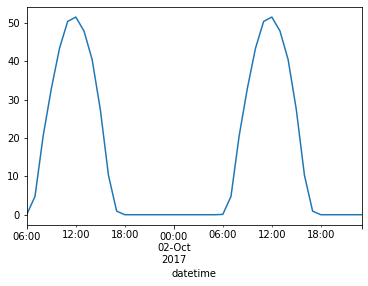

In [23]:
power_hourly.loc['2017-10-01':'2017-10-02', 'power'].plot()

In [24]:
power_daily = power_actual.resample('D').sum()

In [25]:
power_daily.head(10)

,ghi,gti,power
datetime,,,
2017-10-01,0.0,0.0,330.84
2017-10-02,0.0,0.0,330.84
2017-10-03,0.0,0.0,330.84
2017-10-04,0.0,0.0,330.84
2017-10-05,0.0,0.0,330.84
2017-10-06,0.0,0.0,330.84
2017-10-07,0.0,0.0,330.84
2017-10-08,0.0,0.0,330.84
2017-10-09,0.0,0.0,330.84


In [26]:
power_daily['power'].min()

0.0

In [27]:
power_daily['power'].max()

402111.19000000006

## Analyze Actual Weather Data

In [28]:
weather_actual = pd.read_csv('weather_actuals.csv')

In [29]:
weather_actual.shape

(13619, 31)

In [30]:
weather_actual.dtypes

Unnamed: 0                int64
plant_id                  int64
datetime_utc             object
datetime_local           object
cloud_cover             float64
apparent_temperature    float64
temperature               int64
humidity                  int64
dew_point               float64
wind_bearing              int64
wind_speed              float64
wind_chill              float64
wind_gust               float64
heat_index              float64
pressure                float64
qpf                     float64
uv_index                  int64
snow                    float64
pop                     float64
fctcode                 float64
ozone                   float64
precip_accumulation     float64
precip_intensity        float64
precip_probability      float64
precip_type              object
visibility              float64
sunrise                  object
sunset                   object
icon                     object
summary                  object
updated_at               object
dtype: o

In [31]:
for column in weather_actual.columns.values:
    if weather_actual.dtypes[column]=='int64' or weather_actual.dtypes[column]=='float64':
        print('{}| Max: {} | Min: {}'.format(
            column, weather_actual[column].max(), weather_actual[column].min()
        ))

Unnamed: 0| Max: 13618 | Min: 0
plant_id| Max: 1 | Min: 1
cloud_cover| Max: 1.0 | Min: -9999.0
apparent_temperature| Max: 49.75 | Min: 3.14
temperature| Max: 47 | Min: 5
humidity| Max: 1 | Min: 0
dew_point| Max: 28.35 | Min: -20.56
wind_bearing| Max: 359 | Min: -9999
wind_speed| Max: 9.73 | Min: -9999.0
wind_chill| Max: -9999.0 | Min: -9999.0
wind_gust| Max: 15.15 | Min: -9999.0
heat_index| Max: -9999.0 | Min: -9999.0
pressure| Max: 1025.69 | Min: -9999.0
qpf| Max: -9999.0 | Min: -9999.0
uv_index| Max: 12 | Min: -9999
snow| Max: -9999.0 | Min: -9999.0
pop| Max: -9999.0 | Min: -9999.0
fctcode| Max: -9999.0 | Min: -9999.0
ozone| Max: 351.7 | Min: -9999.0
precip_accumulation| Max: -9999.0 | Min: -9999.0
precip_intensity| Max: 6.22 | Min: -9999.0
precip_probability| Max: 0.73 | Min: -9999.0
visibility| Max: 16.09 | Min: -9999.0


In [32]:
weather_drop = weather_actual.drop(
    columns=['Unnamed: 0', 'plant_id', 'wind_chill', 'pop',
             'heat_index', 'qpf', 'sunset', 'sunrise', 'snow',
             'updated_at', 'icon', 'fctcode', 'precip_accumulation',
             'datetime_utc'
            ]
)

In [33]:
len(weather_drop.columns.values)

17

In [34]:
set(weather_drop['precip_probability'])

{-9999.0,
 0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.52,
 0.53,
 0.55,
 0.59,
 0.6,
 0.61,
 0.62,
 0.65,
 0.66,
 0.67,
 0.68,
 0.71,
 0.72,
 0.73}

Probability can be in the range of 0 to 1. -9999 is clearly a false data. Replace all negetive and NaN values with 0

In [35]:
weather_drop.precip_probability.fillna(value=0, inplace=True)

In [36]:
weather_drop.precip_probability.replace({-9999: 0}, inplace=True)

In [37]:
set(weather_drop['precip_probability'])

{0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.52,
 0.53,
 0.55,
 0.59,
 0.6,
 0.61,
 0.62,
 0.65,
 0.66,
 0.67,
 0.68,
 0.71,
 0.72,
 0.73}

Replace all NaN values in Dataframe to 0

In [38]:
weather_drop.fillna(value=0, inplace=True)

Replace all -9999 with 0

In [39]:
weather_drop.replace({-9999: 0}, inplace=True)

In [40]:
weather_drop.head(10)

,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,precip_type,visibility,summary
0,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,0.83,0.0,1007.90,0,0.0,0.0,0.0,rain,3.57,Clear
1,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,0,0.00,0.0,0.00,0,0.0,0.0,0.0,rain,3.06,Foggy
2,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,0,0.00,0.0,0.00,0,0.0,0.0,0.0,rain,3.06,Foggy
3,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270,0.45,0.0,1008.12,0,0.0,0.0,0.0,rain,3.56,Clear
4,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,0,0.00,0.0,0.00,0,0.0,0.0,0.0,rain,3.06,Foggy
5,2017-10-01 05:00:00,0.0,24.13,24,1,17.84,0,0.00,0.0,0.00,0,0.0,0.0,0.0,rain,3.06,Foggy
6,2017-10-01 06:00:00,0.0,21.87,22,1,17.45,0,0.00,0.0,1008.65,0,0.0,0.0,0.0,rain,3.56,Clear
7,2017-10-01 07:00:00,0.0,25.23,25,1,17.71,0,0.00,0.0,0.00,0,0.0,0.0,0.0,rain,3.06,Foggy
8,2017-10-01 08:00:00,0.0,24.29,24,1,18.94,0,0.00,0.0,0.00,0,0.0,0.0,0.0,rain,3.30,Clear
9,2017-10-01 09:00:00,0.0,26.56,26,1,17.33,237,0.60,0.0,1009.95,0,0.0,0.0,0.0,rain,3.85,Clear


In [41]:
weather_drop['datetime_local'] = pd.to_datetime(weather_drop['datetime_local'])

In [42]:
weather_drop = weather_drop.rename(columns={'datetime_local': 'datetime'})

In [43]:
weather_drop = weather_drop.set_index(weather_drop['datetime'])

In [44]:
weather_drop.head()

,datetime,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,precip_type,visibility,summary
datetime,,,,,,,,,,,,,,,,,
2017-10-01 00:00:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,0.83,0.0,1007.90,0,0.0,0.0,0.0,rain,3.57,Clear
2017-10-01 01:00:00,2017-10-01 01:00:00,0.0,28.78,27,1,20.06,0,0.00,0.0,0.00,0,0.0,0.0,0.0,rain,3.06,Foggy
2017-10-01 02:00:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.97,0,0.00,0.0,0.00,0,0.0,0.0,0.0,rain,3.06,Foggy
2017-10-01 03:00:00,2017-10-01 03:00:00,0.0,23.84,23,1,18.66,270,0.45,0.0,1008.12,0,0.0,0.0,0.0,rain,3.56,Clear
2017-10-01 04:00:00,2017-10-01 04:00:00,0.0,24.13,24,1,17.84,0,0.00,0.0,0.00,0,0.0,0.0,0.0,rain,3.06,Foggy


In [45]:
weather_drop = weather_drop.drop(columns=['datetime'])

### Resample Weather Data to daily data

Weather data as analysed above is in hourly intervals. It is safe to rollup/aggregate the available data on a daily scale. The reason for doing so is that we are dealing with Solar Power which is generated only during the Day Hours while we have weather data for 24 hours. Also, we need to predict power generation for 27 days based on the weather forecast data. 

In [46]:
weather_daily = weather_drop.resample('D').mean()

In [47]:
weather_daily.head(10)

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility
datetime,,,,,,,,,,,,,,
2017-10-01,0.000000,29.876667,29.375000,0.541667,17.369583,158.333333,1.280417,0.0,335.769583,0.0,0.0,0.0,0.0,3.761667
2017-10-02,0.000000,29.584167,29.291667,0.500000,16.819583,198.583333,1.580000,0.0,335.377917,0.0,0.0,0.0,0.0,3.903750
2017-10-03,0.000000,30.060833,28.958333,0.583333,18.680000,230.916667,1.422083,0.0,335.731667,0.0,0.0,0.0,0.0,3.629583
2017-10-04,0.007500,30.525417,29.333333,0.583333,19.312500,212.458333,1.392917,0.0,336.217917,0.0,0.0,0.0,0.0,3.537083
2017-10-05,0.000000,31.225833,30.208333,0.541667,18.753750,214.625000,1.837917,0.0,336.284583,0.0,0.0,0.0,0.0,3.494167
2017-10-06,0.000000,30.549167,30.166667,0.458333,16.855417,213.958333,1.438750,0.0,336.371250,0.0,0.0,0.0,0.0,3.537500
2017-10-07,0.000000,29.452500,28.791667,0.583333,17.885000,233.083333,1.351667,0.0,336.061667,0.0,0.0,0.0,0.0,3.398750
2017-10-08,0.000000,29.776250,28.500000,0.666667,19.351667,109.333333,0.901667,0.0,335.710833,0.0,0.0,0.0,0.0,2.926667
2017-10-09,0.005833,29.696667,28.541667,0.708333,19.052500,67.416667,0.861667,0.0,335.768333,0.0,0.0,0.0,0.0,3.105417


### Merge Dataframes Power and Weather

Now that we have analysed power and weather data individually, lets merge these data sets together to analyse the correlation between weather attributes and power generation.

In [48]:
merged_daily = pd.merge(weather_daily, power_daily, on='datetime')

In [49]:
merged_daily.fillna(value=0, inplace=True)

In [50]:
merged_daily.head(10)

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,ghi,gti,power
datetime,,,,,,,,,,,,,,,,,
2017-10-01,0.000000,29.876667,29.375000,0.541667,17.369583,158.333333,1.280417,0.0,335.769583,0.0,0.0,0.0,0.0,3.761667,0.0,0.0,330.84
2017-10-02,0.000000,29.584167,29.291667,0.500000,16.819583,198.583333,1.580000,0.0,335.377917,0.0,0.0,0.0,0.0,3.903750,0.0,0.0,330.84
2017-10-03,0.000000,30.060833,28.958333,0.583333,18.680000,230.916667,1.422083,0.0,335.731667,0.0,0.0,0.0,0.0,3.629583,0.0,0.0,330.84
2017-10-04,0.007500,30.525417,29.333333,0.583333,19.312500,212.458333,1.392917,0.0,336.217917,0.0,0.0,0.0,0.0,3.537083,0.0,0.0,330.84
2017-10-05,0.000000,31.225833,30.208333,0.541667,18.753750,214.625000,1.837917,0.0,336.284583,0.0,0.0,0.0,0.0,3.494167,0.0,0.0,330.84
2017-10-06,0.000000,30.549167,30.166667,0.458333,16.855417,213.958333,1.438750,0.0,336.371250,0.0,0.0,0.0,0.0,3.537500,0.0,0.0,330.84
2017-10-07,0.000000,29.452500,28.791667,0.583333,17.885000,233.083333,1.351667,0.0,336.061667,0.0,0.0,0.0,0.0,3.398750,0.0,0.0,330.84
2017-10-08,0.000000,29.776250,28.500000,0.666667,19.351667,109.333333,0.901667,0.0,335.710833,0.0,0.0,0.0,0.0,2.926667,0.0,0.0,330.84
2017-10-09,0.005833,29.696667,28.541667,0.708333,19.052500,67.416667,0.861667,0.0,335.768333,0.0,0.0,0.0,0.0,3.105417,0.0,0.0,330.84


### Analyst Power Generation against multiple factors

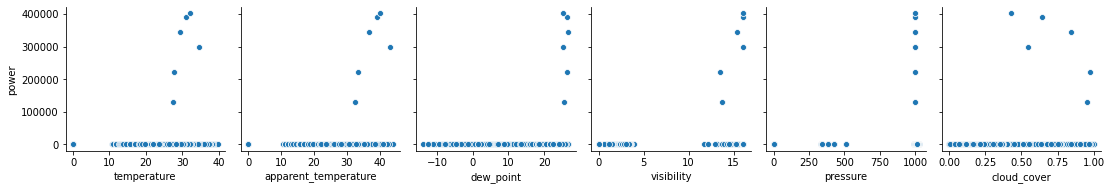

In [51]:
sns.pairplot(merged_daily, x_vars=['temperature', 'apparent_temperature', 'dew_point', 'visibility', 'pressure', 'cloud_cover'], y_vars=['power'])

In [52]:
merged_daily = merged_daily.reset_index()
merged_daily.head()

,datetime,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,ghi,gti,power
0,2017-10-01,0.0000,29.876667,29.375000,0.541667,17.369583,158.333333,1.280417,0.0,335.769583,0.0,0.0,0.0,0.0,3.761667,0.0,0.0,330.84
1,2017-10-02,0.0000,29.584167,29.291667,0.500000,16.819583,198.583333,1.580000,0.0,335.377917,0.0,0.0,0.0,0.0,3.903750,0.0,0.0,330.84
2,2017-10-03,0.0000,30.060833,28.958333,0.583333,18.680000,230.916667,1.422083,0.0,335.731667,0.0,0.0,0.0,0.0,3.629583,0.0,0.0,330.84
3,2017-10-04,0.0075,30.525417,29.333333,0.583333,19.312500,212.458333,1.392917,0.0,336.217917,0.0,0.0,0.0,0.0,3.537083,0.0,0.0,330.84
4,2017-10-05,0.0000,31.225833,30.208333,0.541667,18.753750,214.625000,1.837917,0.0,336.284583,0.0,0.0,0.0,0.0,3.494167,0.0,0.0,330.84


In [53]:
merged_hourly = pd.merge(weather_drop, power_hourly, on='datetime')

In [54]:
merged_hourly.head(10)

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,precip_type,visibility,summary,ghi,gti,power
datetime,,,,,,,,,,,,,,,,,,,
2017-10-01 06:00:00,0.0,21.87,22,1,17.45,0,0.00,0.0,1008.65,0,0.0,0.0,0.0,rain,3.56,Clear,0.0,0.0,0.08
2017-10-01 07:00:00,0.0,25.23,25,1,17.71,0,0.00,0.0,0.00,0,0.0,0.0,0.0,rain,3.06,Foggy,0.0,0.0,4.77
2017-10-01 08:00:00,0.0,24.29,24,1,18.94,0,0.00,0.0,0.00,0,0.0,0.0,0.0,rain,3.30,Clear,0.0,0.0,20.55
2017-10-01 09:00:00,0.0,26.56,26,1,17.33,237,0.60,0.0,1009.95,0,0.0,0.0,0.0,rain,3.85,Clear,0.0,0.0,32.90
2017-10-01 10:00:00,0.0,32.03,31,0,18.09,281,2.63,0.0,0.00,0,0.0,0.0,0.0,rain,3.54,Clear,0.0,0.0,43.42
2017-10-01 11:00:00,0.0,33.31,32,0,17.72,278,3.73,0.0,0.00,0,0.0,0.0,0.0,rain,3.78,Clear,0.0,0.0,50.44
2017-10-01 12:00:00,0.0,36.14,36,0,16.43,304,0.96,0.0,1008.54,0,0.0,0.0,0.0,rain,3.91,Clear,0.0,0.0,51.59
2017-10-01 13:00:00,0.0,35.63,36,0,15.56,291,3.97,0.0,0.00,0,0.0,0.0,0.0,rain,4.49,Clear,0.0,0.0,47.95
2017-10-01 14:00:00,0.0,35.57,36,0,14.50,315,4.67,0.0,0.00,0,0.0,0.0,0.0,rain,4.75,Clear,0.0,0.0,40.48


In [55]:
merged_hourly = merged_hourly.drop(columns=['precip_type', 'summary'])

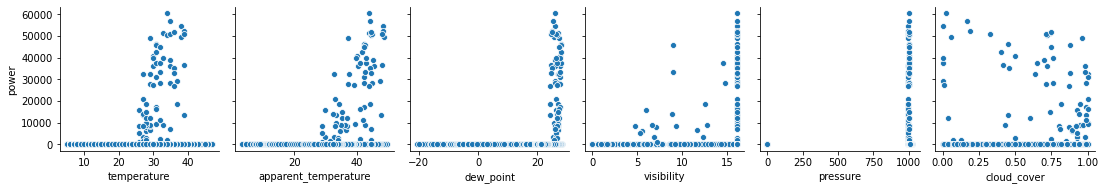

In [56]:
sns.pairplot(merged_hourly, x_vars=['temperature', 'apparent_temperature', 'dew_point', 'visibility', 'pressure', 'cloud_cover'], y_vars=['power'])

Based on the above graphs, we see there exists some correlation between power generated and different attributes of weather data, for instance cloud cover and temperature. We will use this knowledge to predict power generation for future days based on the weather forecast. 

### Read Weather Forecast Data

We are provided with weather forecast data for the next 27 days. We will read this data into a dataframe, pre-process it to look similar to our merged dataset above. This will make these two dataframes similar. This dataset can then be used as our test dataset to predict power generation.

In [57]:
weather_forecast = pd.read_csv('weather_forecast.csv')

In [58]:
weather_forecast['datetime_local'] = pd.to_datetime(weather_forecast['datetime_local'])

In [59]:
for column in weather_forecast.columns.values:
    if weather_forecast.dtypes[column]=='int64' or weather_forecast.dtypes[column]=='float64':
        print('{}| Max: {} | Min: {}'.format(
            column, weather_forecast[column].max(), weather_forecast[column].min()
        ))

Unnamed: 0| Max: 647 | Min: 0
plant_id| Max: 1 | Min: 1
cloud_cover| Max: 1.0 | Min: 0.0
apparent_temperature| Max: 36.34 | Min: 18.3
temperature| Max: 36 | Min: 18
humidity| Max: 1 | Min: 0
dew_point| Max: 22.35 | Min: 2.95
wind_bearing| Max: 359 | Min: 0
wind_speed| Max: 4.43 | Min: 0.6
wind_chill| Max: nan | Min: nan
wind_gust| Max: 10.54 | Min: 0.84
heat_index| Max: nan | Min: nan
pressure| Max: 1016.9 | Min: 1005.92
qpf| Max: nan | Min: nan
uv_index| Max: 8 | Min: 0
snow| Max: nan | Min: nan
pop| Max: nan | Min: nan
fctcode| Max: nan | Min: nan
ozone| Max: 284.9 | Min: 262.8
precip_accumulation| Max: nan | Min: nan
precip_intensity| Max: 0.42 | Min: 0.0
precip_probability| Max: 0.06 | Min: 0.0
visibility| Max: 16.09 | Min: 16.09


In [60]:
weather_forecast = weather_forecast.drop(
    columns=['Unnamed: 0', 'plant_id', 'wind_chill', 'pop',
             'heat_index', 'qpf', 'sunset', 'sunrise', 'snow',
             'updated_at', 'icon', 'fctcode', 'precip_accumulation',
             'datetime_utc'
            ]
)

In [61]:
weather_forecast.fillna(value=0, inplace=True)

In [62]:
weather_forecast = weather_forecast.rename(columns={'datetime_local': 'datetime'})

In [63]:
weather_forecast = weather_forecast.set_index(weather_forecast['datetime'])

In [64]:
weather_forecast.head()

,datetime,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,precip_type,visibility,summary
datetime,,,,,,,,,,,,,,,,,
2019-10-01 00:00:00,2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,3.08,6.42,1008.45,0,268.6,0.0,0.0,0,16.09,Partly Cloudy
2019-10-01 01:00:00,2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,2.94,6.28,1008.24,0,269.1,0.0,0.0,0,16.09,Partly Cloudy
2019-10-01 02:00:00,2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,2.82,6.08,1007.90,0,269.7,0.0,0.0,0,16.09,Partly Cloudy
2019-10-01 03:00:00,2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,2.63,5.74,1007.61,0,270.4,0.0,0.0,0,16.09,Partly Cloudy
2019-10-01 04:00:00,2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,2.39,5.30,1007.51,0,271.3,0.0,0.0,0,16.09,Partly Cloudy


In [65]:
wf_hourly = weather_forecast.drop(columns='datetime')

In [66]:
wf_hourly.dtypes

cloud_cover             float64
apparent_temperature    float64
temperature               int64
humidity                  int64
dew_point               float64
wind_bearing              int64
wind_speed              float64
wind_gust               float64
pressure                float64
uv_index                  int64
ozone                   float64
precip_intensity        float64
precip_probability      float64
precip_type              object
visibility              float64
summary                  object
dtype: object

In [67]:
wf_hourly = wf_hourly.drop(columns=['precip_type', 'summary'])

In [68]:
wf_daily = wf_hourly.resample('D').mean()

In [69]:
wf_hourly.head(10)

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility
datetime,,,,,,,,,,,,,,
2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,3.08,6.42,1008.45,0,268.6,0.0,0.0,16.09
2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,2.94,6.28,1008.24,0,269.1,0.0,0.0,16.09
2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,2.82,6.08,1007.90,0,269.7,0.0,0.0,16.09
2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,2.63,5.74,1007.61,0,270.4,0.0,0.0,16.09
2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,2.39,5.30,1007.51,0,271.3,0.0,0.0,16.09
2019-10-01 05:00:00,0.49,24.00,23,1,21.56,94,2.09,4.47,1008.03,0,271.6,0.0,0.0,16.09
2019-10-01 06:00:00,0.48,25.08,24,1,21.97,95,2.31,4.07,1008.61,0,271.8,0.0,0.0,16.09
2019-10-01 07:00:00,0.51,25.69,25,1,22.34,96,2.98,4.65,1008.97,0,272.4,0.0,0.0,16.09
2019-10-01 08:00:00,0.59,26.22,25,1,22.35,99,3.44,5.14,1009.53,1,272.8,0.0,0.0,16.09


In [70]:
wf_daily.head()

,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility
datetime,,,,,,,,,,,,,,
2019-10-01,0.479167,29.653750,27.916667,0.833333,21.217500,70.375000,2.730000,4.338750,1008.262500,1.500000,272.366667,0.020417,0.003333,16.09
2019-10-02,0.079583,29.612083,28.125000,0.791667,20.385833,68.250000,1.867917,3.726667,1009.831667,1.875000,275.866667,0.009583,0.004167,16.09
2019-10-03,0.446667,29.987917,28.708333,0.750000,19.597917,149.625000,2.157917,4.180833,1009.483750,1.500000,273.650000,0.041667,0.011250,16.09
2019-10-04,0.285000,28.661250,27.958333,0.708333,18.388333,80.166667,2.596667,3.724583,1010.388750,1.375000,275.279167,0.025417,0.010833,16.09
2019-10-05,0.325833,27.997500,27.583333,0.625000,18.061250,179.791667,1.997917,2.631667,1010.696250,1.458333,279.408333,0.002083,0.002083,16.09


In [71]:
wf_daily = wf_daily.reset_index()
wf_daily.head()

,datetime,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility
0,2019-10-01,0.479167,29.653750,27.916667,0.833333,21.217500,70.375000,2.730000,4.338750,1008.262500,1.500000,272.366667,0.020417,0.003333,16.09
1,2019-10-02,0.079583,29.612083,28.125000,0.791667,20.385833,68.250000,1.867917,3.726667,1009.831667,1.875000,275.866667,0.009583,0.004167,16.09
2,2019-10-03,0.446667,29.987917,28.708333,0.750000,19.597917,149.625000,2.157917,4.180833,1009.483750,1.500000,273.650000,0.041667,0.011250,16.09
3,2019-10-04,0.285000,28.661250,27.958333,0.708333,18.388333,80.166667,2.596667,3.724583,1010.388750,1.375000,275.279167,0.025417,0.010833,16.09
4,2019-10-05,0.325833,27.997500,27.583333,0.625000,18.061250,179.791667,1.997917,2.631667,1010.696250,1.458333,279.408333,0.002083,0.002083,16.09


### Train the Model

Based on the actual and forecast data, we can prepare to test and train data to create a predictive model which can predict power generation based on the forecast weather.

In [72]:
X_train_daily = merged_daily.loc[:,['temperature','cloud_cover']]

In [73]:
Y_train_daily = merged_daily.loc[:, ['power']]

In [74]:
X_test_daily = wf_daily.loc[:,['temperature','cloud_cover']]

## 

In [75]:
# import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# instantiate LinearRegression
lr = LinearRegression()

In [76]:
lr.fit(X_train_daily,Y_train_daily)

LinearRegression()

In [77]:
X_test_daily.head()

,temperature,cloud_cover
0,27.916667,0.479167
1,28.125000,0.079583
2,28.708333,0.446667
3,27.958333,0.285000
4,27.583333,0.325833


In [78]:
Y_test_daily= lr.predict(X_test_daily)

In [79]:
Y_test_daily

array([[ 7808.32172672],
       [ 1725.49072547],
       [ 7356.13034577],
       [ 4849.26331812],
       [ 5451.43784528],
       [12817.18780013],
       [ 9965.38290029],
       [  463.65763176],
       [  475.10098429],
       [  465.94630227],
       [  465.94630227],
       [  539.4276711 ],
       [ 2369.37251117],
       [ 5133.98738325],
       [  568.93647499],
       [  550.62711095],
       [ 1304.05107591],
       [ 2367.30438925],
       [ 1477.11811165],
       [ 1602.68098444],
       [  369.82214106],
       [  381.26549359],
       [  374.39948207],
       [  424.75023318],
       [  385.84283459],
       [  362.95612955],
       [  330.91474248]])

The above model returned 27 values of power corresponding to the 27 days of weather forecast.

In [80]:
Power_result = pd.DataFrame(Y_test_daily)
print(Power_result)

               0
0    7808.321727
1    1725.490725
2    7356.130346
3    4849.263318
4    5451.437845
5   12817.187800
6    9965.382900
7     463.657632
8     475.100984
9     465.946302
10    465.946302
11    539.427671
12   2369.372511
13   5133.987383
14    568.936475
15    550.627111
16   1304.051076
17   2367.304389
18   1477.118112
19   1602.680984
20    369.822141
21    381.265494
22    374.399482
23    424.750233
24    385.842835
25    362.956130
26    330.914742


In [81]:
Power_result.sum().round(2)

0    70387.32
dtype: float64

Total power generated during the 27 day period: **70387.32**

In [82]:
Power_result = Power_result.rename(columns={0:'power'})
Power_result


,power
0,7808.321727
1,1725.490725
2,7356.130346
3,4849.263318
4,5451.437845
5,12817.187800
6,9965.382900
7,463.657632
8,475.100984
9,465.946302


Lets merge the weather forecast data and power forecast data to create a dataframe, which we can then output to a CSV.

In [83]:
weather_power_result= pd.merge(wf_daily, Power_result, left_index=True, right_index=True)

In [84]:
weather_power_result

,datetime,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,power
0,2019-10-01,0.479167,29.653750,27.916667,0.833333,21.217500,70.375000,2.730000,4.338750,1008.262500,1.500000,272.366667,0.020417,0.003333,16.09,7808.321727
1,2019-10-02,0.079583,29.612083,28.125000,0.791667,20.385833,68.250000,1.867917,3.726667,1009.831667,1.875000,275.866667,0.009583,0.004167,16.09,1725.490725
2,2019-10-03,0.446667,29.987917,28.708333,0.750000,19.597917,149.625000,2.157917,4.180833,1009.483750,1.500000,273.650000,0.041667,0.011250,16.09,7356.130346
3,2019-10-04,0.285000,28.661250,27.958333,0.708333,18.388333,80.166667,2.596667,3.724583,1010.388750,1.375000,275.279167,0.025417,0.010833,16.09,4849.263318
4,2019-10-05,0.325833,27.997500,27.583333,0.625000,18.061250,179.791667,1.997917,2.631667,1010.696250,1.458333,279.408333,0.002083,0.002083,16.09,5451.437845
5,2019-10-06,0.808333,27.975000,27.708333,0.625000,17.128333,159.166667,2.055000,2.600833,1010.932500,1.291667,276.258333,0.005000,0.005000,16.09,12817.187800
6,2019-10-07,0.623750,27.438750,27.041667,0.625000,16.871250,327.625000,2.680417,4.472917,1012.592500,1.416667,275.154167,0.025417,0.008333,16.09,9965.382900
7,2019-10-08,0.000000,27.312500,27.250000,0.458333,14.835000,254.166667,2.359167,3.090000,1011.349583,1.833333,276.537500,0.000000,0.000000,16.09,463.657632
8,2019-10-09,0.000000,27.592500,27.458333,0.291667,14.366250,98.750000,1.652500,2.397500,1010.948750,1.833333,277.291667,0.000000,0.000000,16.09,475.100984
9,2019-10-10,0.000000,27.384583,27.291667,0.541667,15.353333,119.125000,2.091250,3.392500,1011.164167,1.833333,281.450000,0.002083,0.002083,16.09,465.946302


In [85]:
for column in weather_power_result.columns.values:
    if weather_power_result.dtypes[column]=='float64':
        weather_power_result[column] = weather_power_result[column].round(2)

In [86]:
weather_power_result.head()

,datetime,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,visibility,power
0,2019-10-01,0.48,29.65,27.92,0.83,21.22,70.38,2.73,4.34,1008.26,1.50,272.37,0.02,0.00,16.09,7808.32
1,2019-10-02,0.08,29.61,28.12,0.79,20.39,68.25,1.87,3.73,1009.83,1.88,275.87,0.01,0.00,16.09,1725.49
2,2019-10-03,0.45,29.99,28.71,0.75,19.60,149.62,2.16,4.18,1009.48,1.50,273.65,0.04,0.01,16.09,7356.13
3,2019-10-04,0.28,28.66,27.96,0.71,18.39,80.17,2.60,3.72,1010.39,1.38,275.28,0.03,0.01,16.09,4849.26
4,2019-10-05,0.33,28.00,27.58,0.62,18.06,179.79,2.00,2.63,1010.70,1.46,279.41,0.00,0.00,16.09,5451.44


In [87]:
weather_power_result.to_csv('power_forecast.csv', index=True)

The output has been written to *power_forecast.csv*.

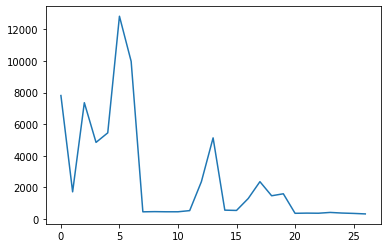

In [89]:
weather_power_result['power'].plot()